# Develop a Metric For Determining how 'Dangerous' a Play is

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import os
import glob
import sys
sys.path.insert(0, '../scripts/')
from football_field import create_football_field
from plots import plot_play

%matplotlib inline
pd.options.display.max_columns = 100

%load_ext autoreload
%autoreload 2

In [33]:
df = pd.read_parquet('../working/momentum-allplays-1yarddistance.parquet')

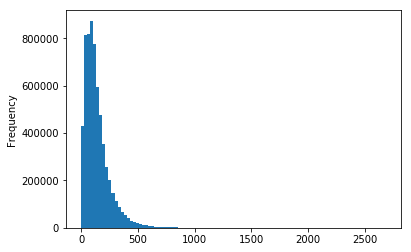

In [6]:
df['opp_momentum'].plot(kind='hist', bins=100)

In [34]:
df['Momentum_Danger_Level'] = pd.cut(df['opp_momentum'], bins=5, labels=['Very_Low', 'Low','Medium','High','Very_High'])

In [35]:
df.groupby('Momentum_Danger_Level').size()

Momentum_Danger_Level
Very_Low     6191822
Low            65250
Medium          2700
High             224
Very_High         10
dtype: int64

In [36]:
df = pd.concat([df, pd.get_dummies(df['Momentum_Danger_Level'], prefix='danger')], axis=1)

In [39]:
counts = df.groupby(['Season_Year','GameKey','PlayID']) \
    ['danger_Very_Low','danger_Low','danger_Medium','danger_High','danger_Very_High'].sum().sort_values('danger_Very_High').reset_index()

In [40]:
counts['heuristic'] = counts['danger_Low'] +
                      (counts['danger_Medium']) +
                      (counts['danger_High'] ) +
                      (counts['danger_Very_High'] * 10)

,Season_Year,GameKey,PlayID,danger_Very_Low,danger_Low,danger_Medium,danger_High,danger_Very_High
0,2016,3,455,1054.0,18.0,0.0,0.0,0.0
1,2017,444,3454,572.0,4.0,0.0,0.0,0.0
2,2017,444,3202,724.0,26.0,0.0,0.0,0.0
3,2017,444,3021,1118.0,6.0,0.0,0.0,0.0
4,2017,444,2973,692.0,6.0,0.0,0.0,0.0


In [69]:
play_danger = df.loc[df['opp_momentum'] > 250].groupby(['Season_Year','GameKey','PlayID'])['opp_momentum'].describe().reset_index()

In [63]:
play_danger.head()

,Season_Year,GameKey,PlayID,count,mean,std,min,25%,50%,75%,max
0,2016,3,455,282.0,311.748190,140.324484,200.707338,228.760124,264.071934,329.007119,866.982684
1,2016,3,1388,94.0,341.470590,138.770260,204.009072,246.541106,301.592891,360.585753,763.770944
2,2016,3,1542,334.0,320.066539,132.389380,200.628268,233.393450,275.116939,342.707027,804.100743
3,2016,3,1676,204.0,316.185132,126.201094,201.375967,231.053748,286.362193,345.815314,765.896076
4,2016,3,2643,568.0,291.905347,89.252908,200.061324,224.625453,258.006641,343.253726,676.381699


In [70]:
pi = pd.read_csv('../input/play_information.csv')

In [71]:
plays_with_danger = pd.merge(pi, play_danger)

In [72]:
plays_with_danger = plays_with_danger.sort_values('max')
plays_with_danger.to_csv('../working/play_with_danger.csv')